# Interpolating $\sin x$ function

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, BarycentricInterpolator, KroghInterpolator



## Define $\sin x$ function

In [27]:
def f(x):
    return np.sin(x)

def chebyshev_nodes(n, a=-1, b=1):
    k = np.arange(n)
    x = np.cos((2*k + 1) * np.pi / (2*(n+1)))   # Chebyshev's nodes in [-1,1]
    return (b - a)/2 * x + (a + b)/2            # map to [a,b]

## Standard basis & Newton

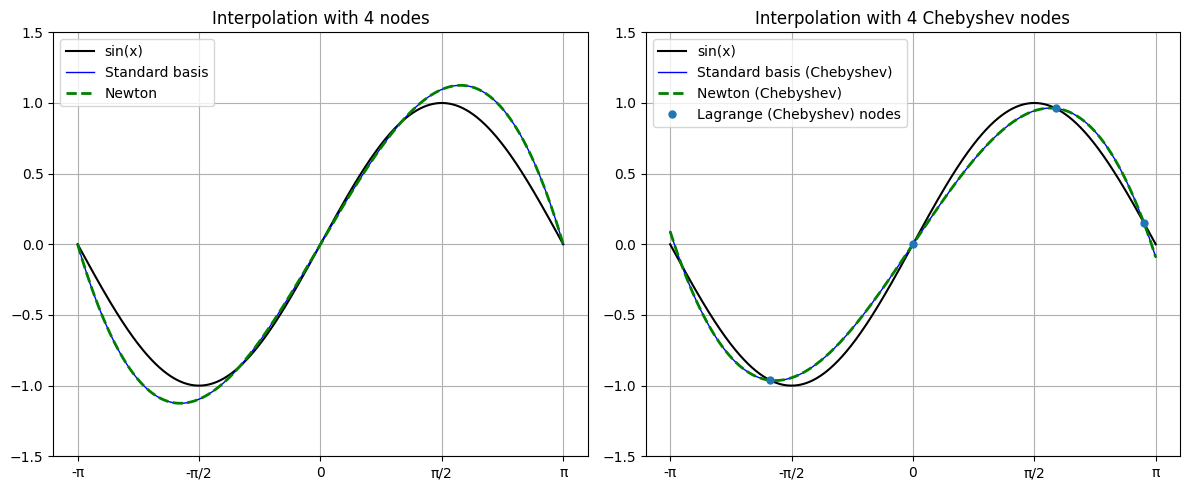

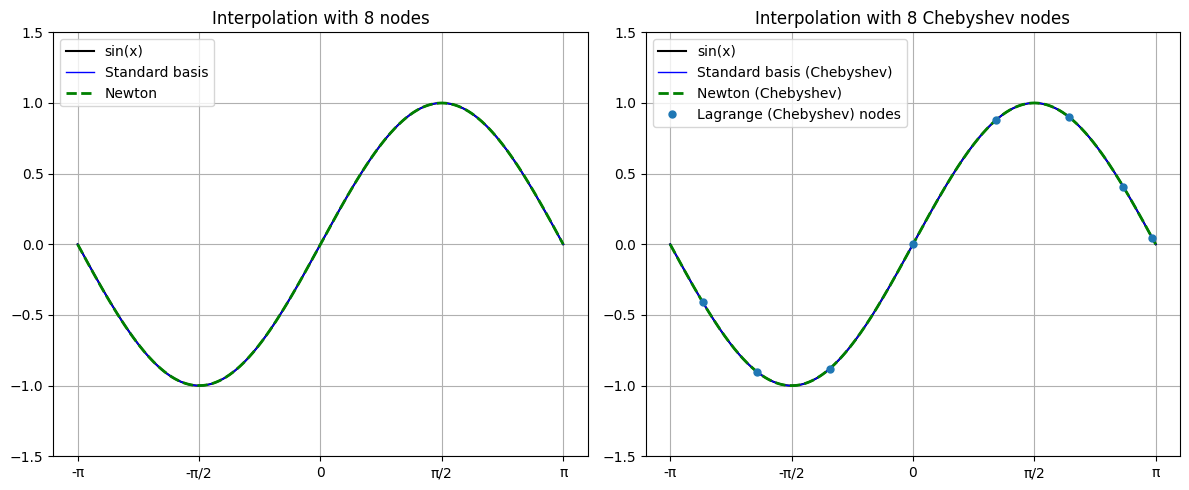

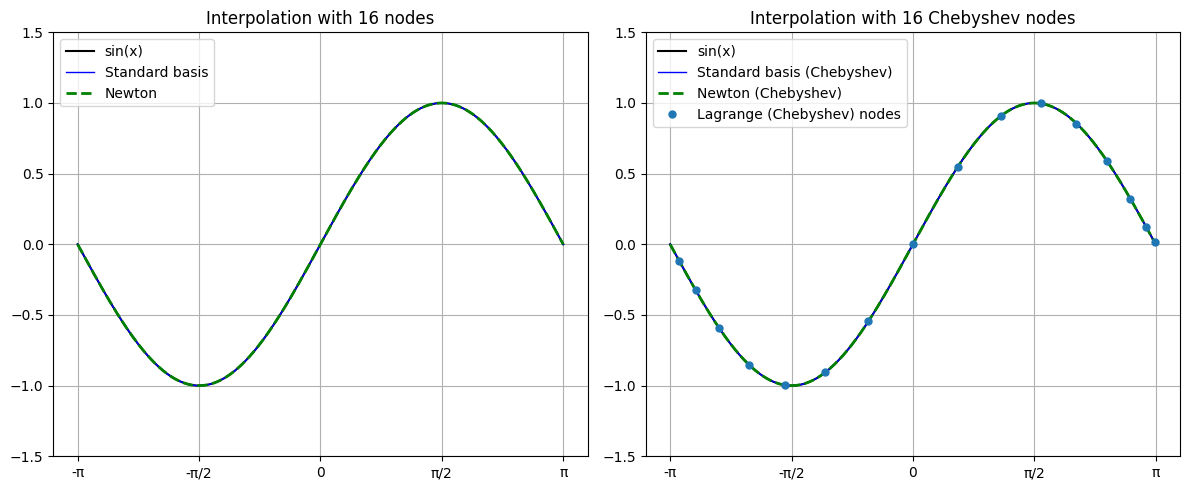

/var/folders/q8/qg42266s5bn3hq7vrzw4nlgc0000gn/T/ipykernel_2310/2483381660.py:18: UserWarning: 32 degrees provided, degrees higher than about thirty cause problems with numerical instability with 'KroghInterpolator'
  newton_interp = KroghInterpolator(x_uniform, y_uniform)
/var/folders/q8/qg42266s5bn3hq7vrzw4nlgc0000gn/T/ipykernel_2310/2483381660.py:26: UserWarning: 32 degrees provided, degrees higher than about thirty cause problems with numerical instability with 'KroghInterpolator'
  newton_interp_cheb = KroghInterpolator(x_Chebyshev, y_Chebyshev)


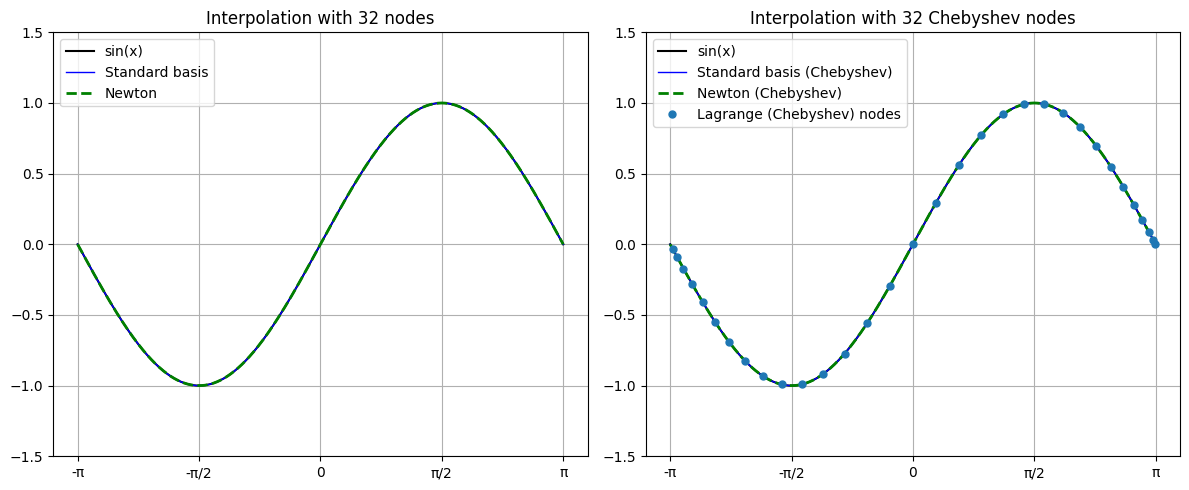

/var/folders/q8/qg42266s5bn3hq7vrzw4nlgc0000gn/T/ipykernel_2310/2483381660.py:13: RankWarning: Polyfit may be poorly conditioned
  poly_coeff = np.polyfit(x_uniform, y_uniform, num_nodes-1)
/var/folders/q8/qg42266s5bn3hq7vrzw4nlgc0000gn/T/ipykernel_2310/2483381660.py:18: UserWarning: 64 degrees provided, degrees higher than about thirty cause problems with numerical instability with 'KroghInterpolator'
  newton_interp = KroghInterpolator(x_uniform, y_uniform)
/var/folders/q8/qg42266s5bn3hq7vrzw4nlgc0000gn/T/ipykernel_2310/2483381660.py:22: RankWarning: Polyfit may be poorly conditioned
  poly_coeff_cheb = np.polyfit(x_Chebyshev, y_Chebyshev, num_nodes-1)
/var/folders/q8/qg42266s5bn3hq7vrzw4nlgc0000gn/T/ipykernel_2310/2483381660.py:26: UserWarning: 64 degrees provided, degrees higher than about thirty cause problems with numerical instability with 'KroghInterpolator'
  newton_interp_cheb = KroghInterpolator(x_Chebyshev, y_Chebyshev)


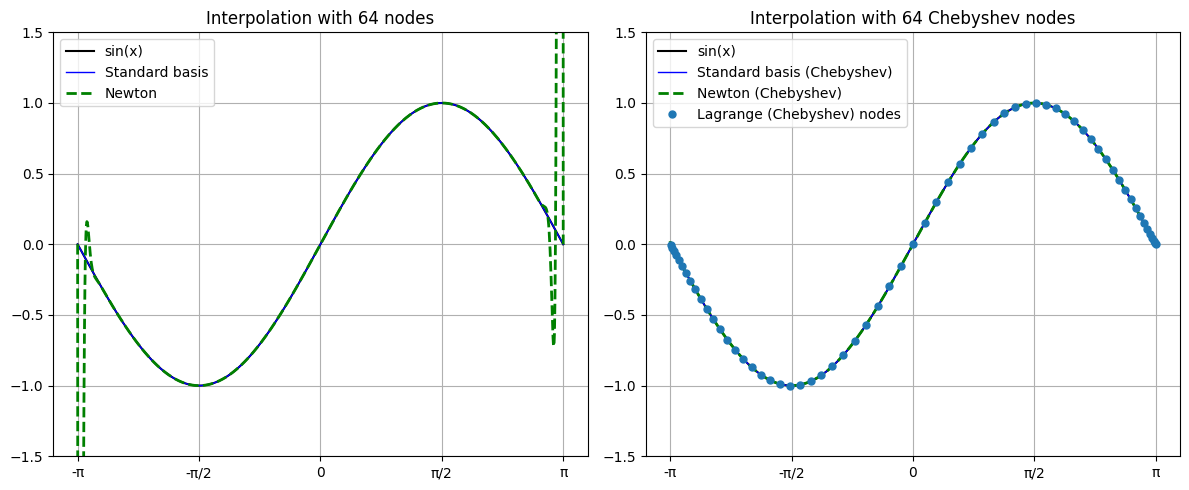

In [37]:
x_plot = np.linspace(-1*np.pi, np.pi, 1000)
y_true = f(x_plot)

for n in [2, 3, 4, 5, 6]:
    num_nodes = 2**n
    x_uniform = np.linspace(-1*np.pi, np.pi, num_nodes)
    y_uniform = f(x_uniform)

    x_Chebyshev = chebyshev_nodes(num_nodes, -np.pi, np.pi)
    y_Chebyshev = f(x_Chebyshev)

    # Standard basis (np.polyfit)
    poly_coeff = np.polyfit(x_uniform, y_uniform, num_nodes-1)
    y_polyfit = np.polyval(poly_coeff, x_plot)
    # print(poly_coeff)  # This will show the coefficients

    # Newton interpolation (KroghInterpolator)
    newton_interp = KroghInterpolator(x_uniform, y_uniform)
    y_newton = newton_interp(x_plot)

    # Standard basis Chebyshev
    poly_coeff_cheb = np.polyfit(x_Chebyshev, y_Chebyshev, num_nodes-1)
    y_polyfit_cheb = np.polyval(poly_coeff_cheb, x_plot)

    # Newton interpolation Chebyshev
    newton_interp_cheb = KroghInterpolator(x_Chebyshev, y_Chebyshev)
    y_newton_cheb = newton_interp_cheb(x_plot)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2),
               ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.plot(x_plot, y_true, 'k', label='sin(x)')
    plt.plot(x_plot, y_polyfit, 'b-', linewidth=1, label='Standard basis')
    plt.plot(x_plot, y_newton, 'g--', linewidth=2, label='Newton')
    plt.title(f'Interpolation with {num_nodes} nodes')
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2),
               ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.plot(x_plot, y_true, 'k', label='sin(x)')
    plt.plot(x_plot, y_polyfit_cheb, 'b-', linewidth=1, label='Standard basis (Chebyshev)')
    plt.plot(x_plot, y_newton_cheb, 'g--', linewidth=2, label='Newton (Chebyshev)')
    plt.plot(x_Chebyshev, y_Chebyshev, 'o', markersize=5, label='Lagrange (Chebyshev) nodes')
    plt.title(f'Interpolation with {num_nodes} Chebyshev nodes')
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

## Lagrange & Barycentric

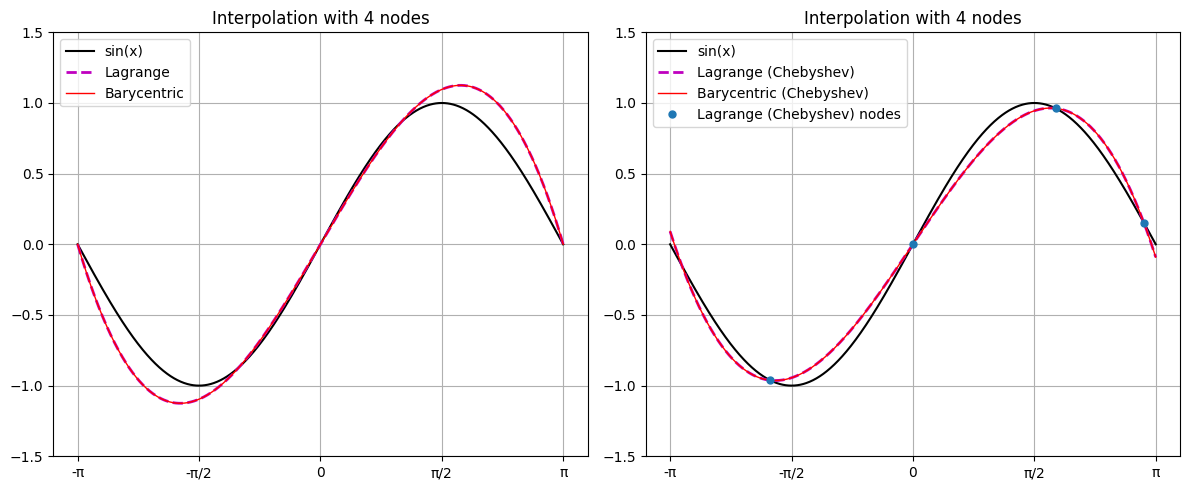

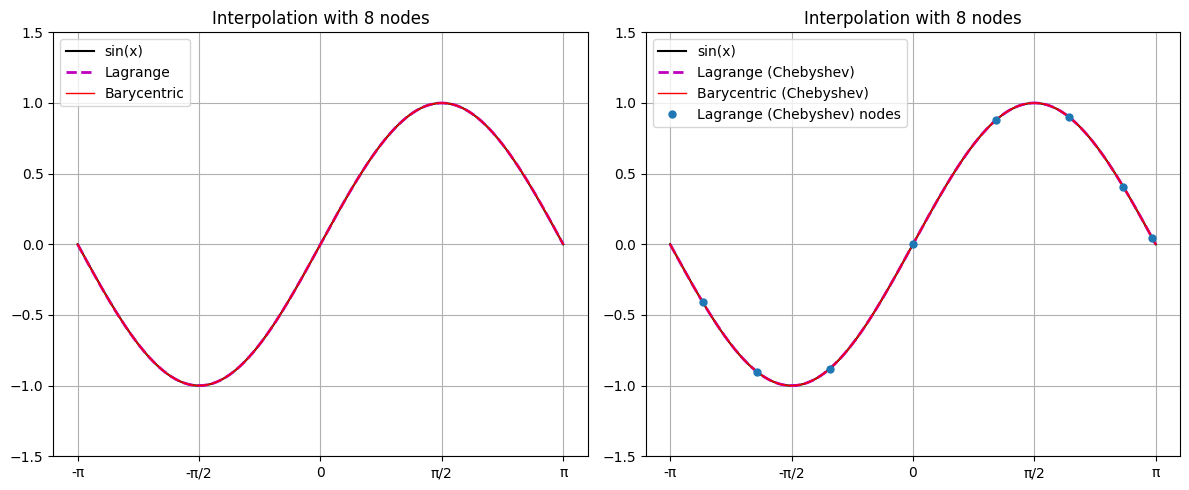

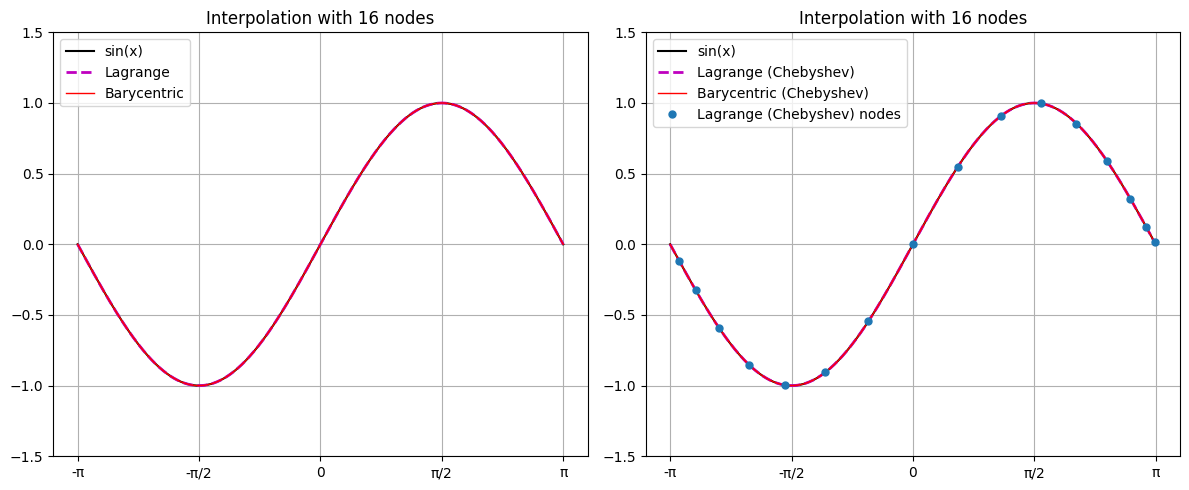

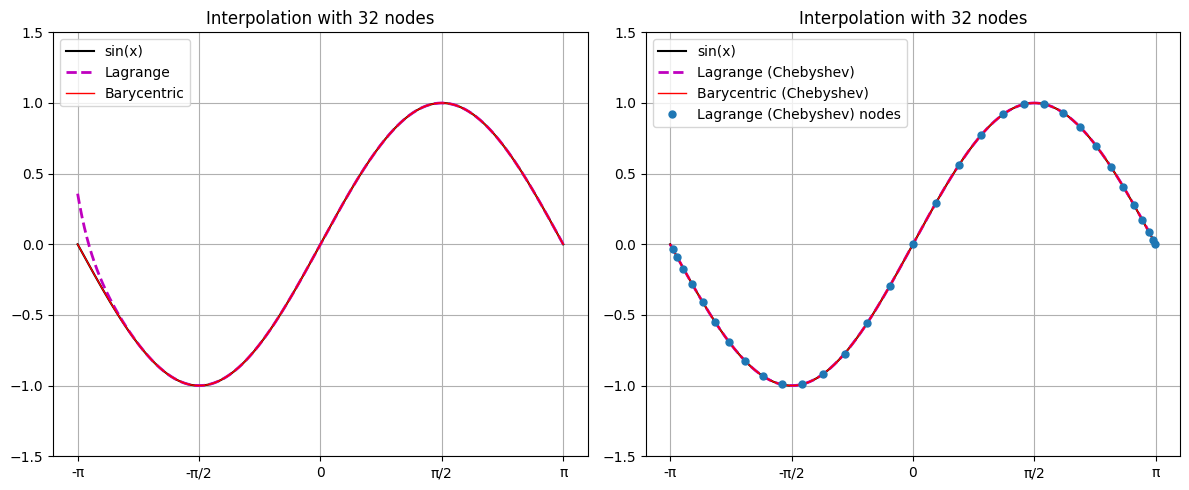

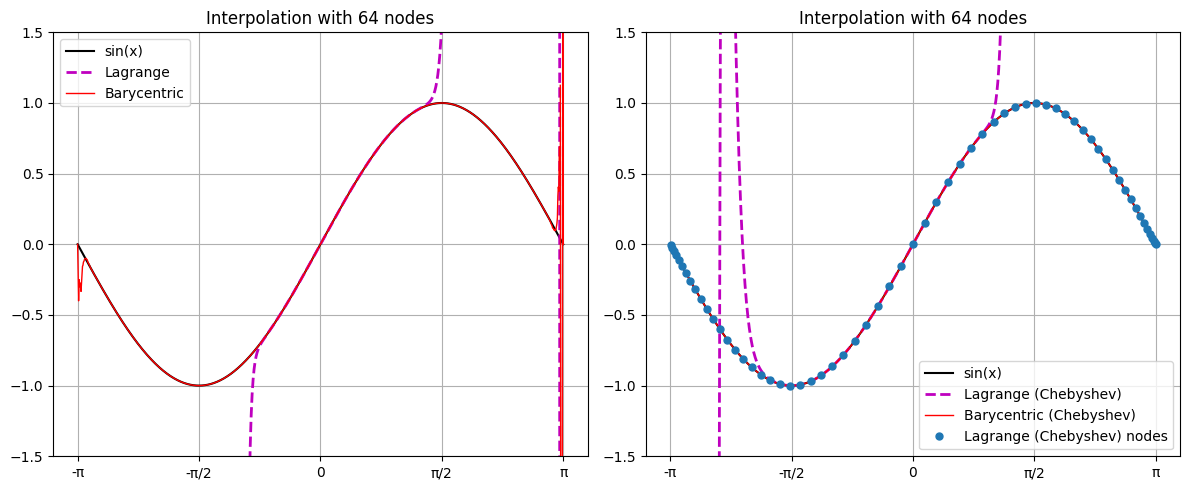

In [38]:
for n in [2, 3, 4, 5, 6]:
    num_nodes = 2**n
    x_uniform = np.linspace(-1*np.pi, np.pi, num_nodes)
    y_uniform = f(x_uniform)

    # Lagrange interpolation
    lagrange_interp = lagrange(x_uniform, y_uniform)
    y_lagrange = lagrange_interp(x_plot)

    # Modified Lagrange (BarycentricInterpolator)
    bary_interp = BarycentricInterpolator(x_uniform, y_uniform)
    y_bary = bary_interp(x_plot)

    # Lagrange interpolation with Chebyshev nodes
    x_Chebyshev = chebyshev_nodes(num_nodes, -np.pi, np.pi)
    y_Chebyshev = f(x_Chebyshev)
    lagrange_interp = lagrange(x_Chebyshev, y_Chebyshev)
    y_lagrange_chebyshev = lagrange_interp(x_plot)

    # Modified Lagrange with Chebyshev nodes
    bary_interp = BarycentricInterpolator(x_Chebyshev, y_Chebyshev)
    y_bary_chebyshev = bary_interp(x_plot)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2),
               ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.plot(x_plot, y_true, 'k', label='sin(x)')
    plt.plot(x_plot, y_lagrange, 'm--', linewidth=2, label='Lagrange')
    plt.plot(x_plot, y_bary, 'r-', linewidth=1, label='Barycentric')
    plt.title(f'Interpolation with {num_nodes} nodes')
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2),
               ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.plot(x_plot, y_true, 'k', label='sin(x)')
    plt.plot(x_plot, y_lagrange_chebyshev, 'm--', linewidth=2, label='Lagrange (Chebyshev)')
    plt.plot(x_plot, y_bary_chebyshev, 'r-', linewidth=1, label='Barycentric (Chebyshev)')
    plt.plot(x_Chebyshev, y_Chebyshev, 'o', markersize=5, label='Lagrange (Chebyshev) nodes')
    plt.title(f'Interpolation with {num_nodes} nodes')
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

### Barycentric weights for Chebyshev-Lobatto nodes (Remains to check)

max error: 5.551115123125783e-16


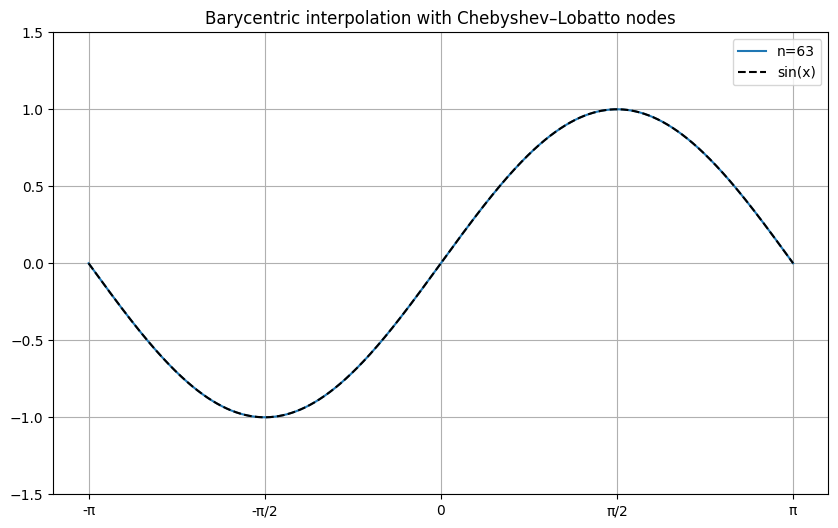

In [43]:
import numpy as np

# Chebyshev–Lobatto nodes on [a,b]
def cheb_lobatto_nodes(n, a=-1.0, b=1.0):
    k = np.arange(n+1)
    x = np.cos(np.pi * k / n)         # in [-1,1]
    return (b - a)/2 * x + (a + b)/2  # map to [a,b]

# Barycentric weights (Lobatto)
def barycentric_weights_lobatto(n):
    k = np.arange(n+1, dtype=float)
    w = (-1.0)**k
    if n >= 1:
        w[0] *= 0.5; w[-1] *= 0.5
    return w

# Barycentric evaluation (stable)
def barycentric_eval(x_nodes, y_nodes, w, xq):
    x_nodes = np.asarray(x_nodes); y_nodes = np.asarray(y_nodes)
    w = np.asarray(w); xq = np.atleast_1d(xq)
    out = np.empty_like(xq, dtype=float)
    for i, x in enumerate(xq):
        diff = x - x_nodes
        j = np.where(diff == 0)[0]
        if j.size: out[i] = y_nodes[j[0]]
        else:
            t = w / diff
            out[i] = np.sum(t * y_nodes) / np.sum(t)
    return out

# Example:
n = 63
a, b = -np.pi, np.pi
x = cheb_lobatto_nodes(n, a, b)
y = np.sin(x)
w = barycentric_weights_lobatto(n)
xx = np.linspace(a, b, 2000)
p  = barycentric_eval(x, y, w, xx)
print("max error:", np.max(np.abs(p - np.sin(xx))))

plt.figure(figsize=(10, 6))
n=63
x = cheb_lobatto_nodes(n, a, b)
y = np.sin(x)
w = barycentric_weights_lobatto(n)
p  = barycentric_eval(x, y, w, xx)
plt.plot(xx, p, label=f'n={n}')
plt.plot(xx, np.sin(xx), 'k--', label='sin(x)')
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2),
           ['-π', '-π/2', '0', 'π/2', 'π'])
plt.ylim(-1.5, 1.5)
plt.title('Barycentric interpolation with Chebyshev–Lobatto nodes')
plt.legend()
plt.grid()
plt.show()
